<a href="https://colab.research.google.com/github/manavbillimoria/smart-city-bus-monitoring/blob/new/pune_bus_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('pune_transport_data.csv')


In [49]:
print(df.describe())

           serial     revenue
count  104.000000  104.000000
mean    52.500000   15.288462
std     30.166206    5.478419
min      1.000000    5.000000
25%     26.750000   15.000000
50%     52.500000   15.000000
75%     78.250000   15.000000
max    104.000000   25.000000


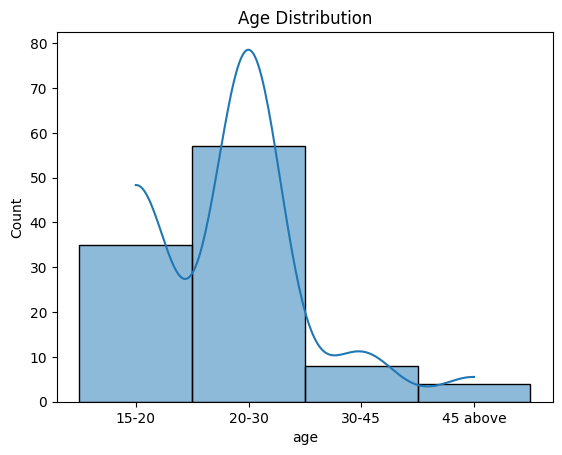

In [50]:
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

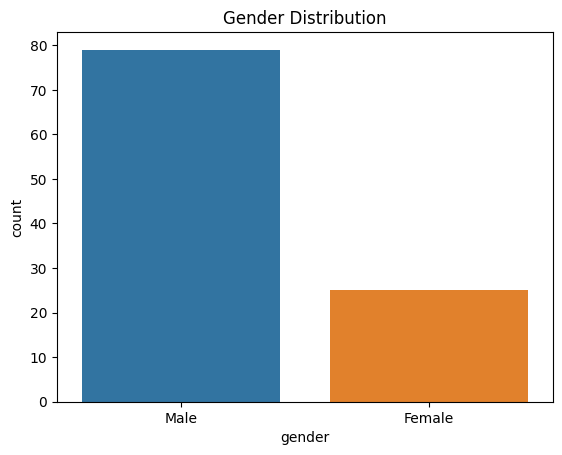

In [51]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()


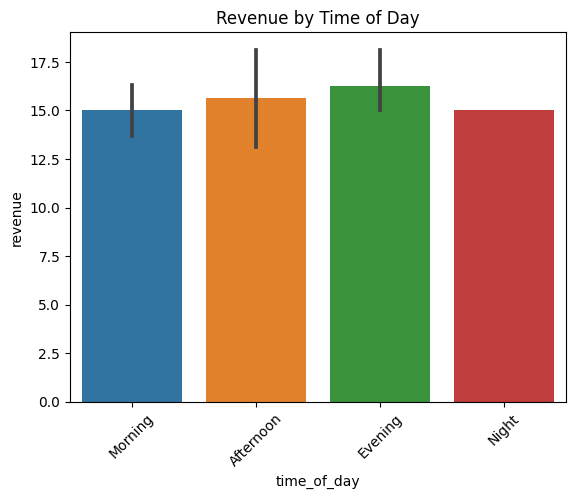

In [52]:
sns.barplot(x='time_of_day', y='revenue', data=df)
plt.title('Revenue by Time of Day')
plt.xticks(rotation=45)
plt.show()


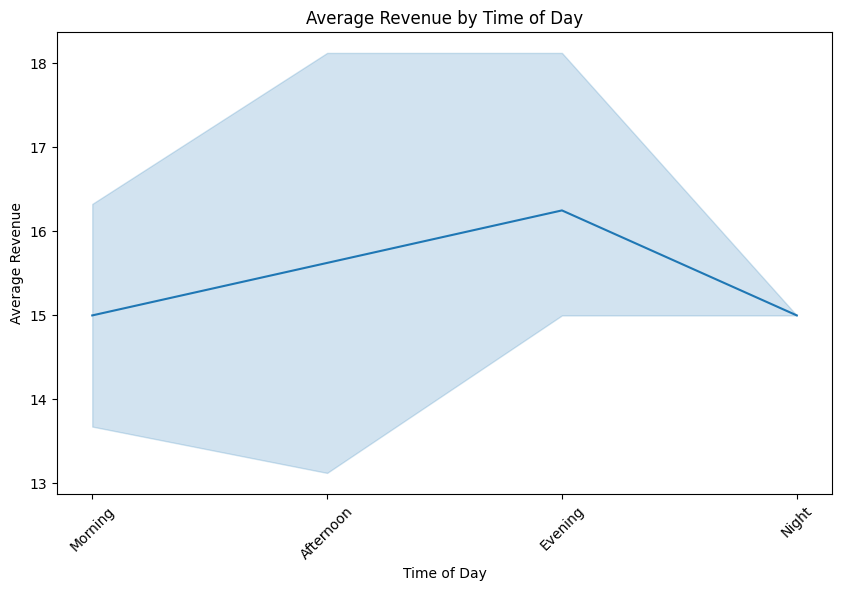

In [53]:


# Visualize revenue by time of day using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='time_of_day', y='revenue', data=df, estimator=np.mean)
plt.title('Average Revenue by Time of Day')
plt.xticks(rotation=45)
plt.xlabel('Time of Day')
plt.ylabel('Average Revenue')
plt.show()



In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [55]:
X = df[['age', 'gender', 'time_of_day', 'start_point', 'end_point', 'improvement_factor']]
y = df['revenue']

In [56]:
X = pd.get_dummies(X, columns=['gender'], drop_first=True)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

ValueError: ignored